In [252]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.cm as cm


In [253]:
######################################################################### download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","Project","donors_preprocessed.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0, encoding='utf-8-sig')

In [254]:
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90480 entries, 95515 to 185114
Data columns (total 163 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [255]:
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.0,4,0,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.0,3,2,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.0,1,2,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.0,5,0,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,1.0,4,0,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
donors.shape

(90480, 163)

In [257]:
non_metric_features=['RECPGVG',
 'INCOME',
 'RECSWEEP',
 'SOLP3',
 'SOLIH',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_F',
 'MDMAUD_A',
 'socio_econ_neighbourhood',
 'STATE_FL',
 'STATE_GA',
 'STATE_IL',
 'STATE_MI',
 'STATE_NC',
 'STATE_Other',
 'STATE_TX',
 'STATE_WA',
 'MDMAUD_R_D',
 'MDMAUD_R_I',
 'MDMAUD_R_L',
 'MDMAUD_R_X',
 'DTSRCE_1',
 'DTSRCE_2',
 'DTSRCE_3',
 'GENDER_J',
 'GENDER_M',
 'GENDER_U',
 'urbanicity_level_1',
 'urbanicity_level_2',
 'urbanicity_level_3',
 'urbanicity_level_4',
 'MSA_1600.0',
 'MSA_4480.0',
 'MSA_Other',
 'DMA_803.0',
 'DMA_807.0',
 'DMA_Other']

In [258]:
len(non_metric_features)

57

In [259]:
metric_features=[
 'NUMCHLD',
 'HIT',
 'POP901',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE904',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP4',
 'HVP5',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT',
 'AGE',
 'TENURE',
 'INACTIVITY',
 'PROMUSE']

In [260]:
len(metric_features)

106

In [261]:
donors['MDMAUD_F'].replace({"X":0}, inplace= True)
donors['MDMAUD_F'].astype('int64', copy=False)

CONTROLN
95515     0
15078     0
172556    0
47784     0
62117     0
         ..
184568    0
122706    0
189641    0
4693      0
185114    1
Name: MDMAUD_F, Length: 90480, dtype: int64

In [262]:
donors.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90480 entries, 95515 to 185114
Data columns (total 163 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   RECPGVG                   int64  
 1   RECSWEEP                  int64  
 2   NUMCHLD                   float64
 3   INCOME                    int64  
 4   HIT                       int64  
 5   SOLP3                     int64  
 6   SOLIH                     int64  
 7   COLLECT1                  int64  
 8   VETERANS                  int64  
 9   BIBLE                     int64  
 10  CATLG                     int64  
 11  HOMEE                     int64  
 12  PETS                      int64  
 13  CDPLAY                    int64  
 14  STEREO                    int64  
 15  PCOWNERS                  int64  
 16  PHOTO                     int64  
 17  CRAFTS                    int64  
 18  FISHER                    int64  
 19  GARDENIN                  int64  
 20  BOATS                 

In [263]:
analysis_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14','MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL']

In [ ]:
from scipy.stats import iqr



In [266]:
iqr=iqr(donors[analysis_metricfeatures].values, axis=0)

In [267]:
median=np.median(donors[analysis_metricfeatures].values, axis=0)

In [247]:
# Normalization
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(donors[metric_features])
scaled_feat

array([[0.        , 0.        , 0.00999037, ..., 0.29166667, 0.60869565,
        0.36      ],
       [0.        , 0.06451613, 0.07087492, ..., 0.25      , 0.60869565,
        0.36      ],
       [0.        , 0.06451613, 0.00642383, ..., 0.375     , 0.60869565,
        0.36      ],
       ...,
       [0.        , 0.        , 0.0055322 , ..., 0.08333333, 0.17391304,
        0.76      ],
       [0.        , 0.        , 0.01763007, ..., 0.41666667, 0.04347826,
        0.88      ],
       [0.        , 0.09677419, 0.03980951, ..., 0.33333333, 0.08695652,
        0.84      ]])

In [248]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [  0.           0.           6.           0.           0.
   0.          16.           4.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  18.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        

In [249]:
donors[metric_features] = scaled_feat
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,urbanicity_level_1,urbanicity_level_2,urbanicity_level_3,urbanicity_level_4,MSA_1600.0,MSA_4480.0,MSA_Other,DMA_803.0,DMA_807.0,DMA_Other
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.000000,4,0.000000,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15078,0,0,0.000000,3,0.064516,-1,-1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172556,0,0,0.000000,1,0.064516,-1,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47784,0,0,0.000000,5,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
62117,0,0,0.142857,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Robust Scaller

In [15]:
from sklearn.preprocessing import RobustScaler

In [222]:
robust=donors.copy()

robust_metric_features= donors[metric_features].values
# perform a robust scaler transform of the dataset
trans = RobustScaler()
robust_metric_features = trans.fit_transform(robust_metric_features)

trans_cluster=RobustScaler()
robust_analysis=donors[analysis_metricfeatures].values
robust_analysis = trans_cluster.fit_transform(robust_analysis)

# convert the array back to a dataframe
#robust_metric_features_df = pd.DataFrame(robust_metric_feautures)
# summarize
#print(robust_metric_features_df.describe())
robust[metric_features] = robust_metric_features
robust.head()
donors[metric_features]=robust_metric_features
donors.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,DMA_Other,PC0,PC1,PC2,PC3,PC4,PC5,PC6,behavior_up_labels,neighborhood_up_labels
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.000000,4,0.000000,-1,-1,0,0,0,...,1.0,-6.231807,-2.143115,0.167018,-2.124966,-0.271186,-0.136501,-0.805619,0,0
15078,0,0,0.000000,3,0.666667,-1,-1,0,0,0,...,1.0,-6.316809,-1.256383,0.487927,-1.457811,-1.110539,0.048238,-0.589379,0,0
172556,0,0,0.000000,1,0.666667,-1,-1,0,0,0,...,1.0,4.406124,4.369176,-1.741919,-3.498286,1.854363,-1.434375,0.835449,0,0
47784,0,0,0.000000,5,0.000000,-1,-1,0,0,0,...,1.0,-5.006481,0.493193,0.354789,-0.741577,0.046251,-0.096787,0.535168,0,0
62117,0,0,0.142857,4,0.000000,-1,-1,0,0,0,...,1.0,-6.436617,-2.012878,0.250819,-0.879596,-1.442759,-1.505367,-0.417552,0,0


In [224]:
robust_analysis

array([[-0.06666667,  0.        ,  0.        , ..., -0.33333333,
        -0.55010745,  1.81111111],
       [ 0.2       ,  0.16666667,  0.        , ...,  0.55555556,
        -0.58740577,  1.38888889],
       [-2.13333333, -0.16666667,  0.        , ...,  0.22222222,
        -0.68320728,  0.35555556],
       ...,
       [-0.73333333,  2.16666667,  0.        , ..., -0.44444444,
        -0.4722356 , -0.21111111],
       [-0.06666667,  0.        ,  1.        , ..., -0.33333333,
         0.08062559,  4.67777778],
       [-0.46666667,  1.83333333,  0.        , ..., -0.11111111,
        12.20271995, 41.08888889]])

# PCA with robust

In [17]:
df_pca1 = robust.copy()

In [18]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA
pca = PCA()
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat1  

array([[-6.23180717e+00, -2.14310275e+00,  1.67053703e-01, ...,
        -2.43768950e-04, -3.55743958e-04, -3.00339010e-03],
       [-6.31680904e+00, -1.25638989e+00,  4.87892060e-01, ...,
        -2.83674209e-04,  2.46980751e-05, -3.10747225e-03],
       [ 4.40612358e+00,  4.36916692e+00, -1.74195791e+00, ...,
         4.36046376e-04,  9.99860782e-03, -9.08464286e-03],
       ...,
       [-6.37776918e+00,  9.18802287e-01,  3.53369713e-01, ...,
         5.81927346e-04,  1.24956854e-03,  2.15312619e-03],
       [ 4.96529119e+00, -1.03466946e+00, -1.61451038e+00, ...,
         8.46132885e-05,  2.59806325e-03,  5.55617715e-04],
       [-4.60576848e+00, -1.94770481e+00, -1.76809924e+00, ...,
         7.69880641e-04,  2.32879604e-03,  3.03837366e-03]])

In [19]:
# Covariance matrix of the data 
cov_matrix1 = df_pca1[metric_features].cov()
cov_matrix1

,NUMCHLD,HIT,POP901,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE,INACTIVITY,PROMUSE
NUMCHLD,0.008077,0.007830,-0.006546,0.000723,-0.000137,-0.001012,0.003746,-0.003746,-0.000613,0.002568,...,-0.004714,0.000498,-0.002237,-0.000582,0.002984,-0.000937,-0.018616,-0.002911,0.001472,-0.001526
HIT,0.007830,3.220259,-0.395782,0.064555,0.008705,-0.127826,-0.091586,0.091558,0.073489,-0.076188,...,0.075988,-0.085514,-0.027745,-0.026716,-0.243459,-0.061816,0.013863,0.083583,-0.029610,0.028307
POP901,-0.006546,-0.395782,7.270573,-0.010968,0.012791,0.001544,0.112985,-0.113254,-0.229342,0.216403,...,-0.012830,0.067014,0.077910,0.045293,0.041859,0.081097,0.026263,-0.028522,-0.014157,0.014263
POP90C1,0.000723,0.064555,-0.010968,0.229359,-0.081992,-0.257171,-0.065632,0.065626,-0.123745,0.124250,...,-0.020775,0.027033,0.026309,0.021959,0.039781,0.032921,-0.010505,-0.014314,-0.000041,0.000164
POP90C2,-0.000137,0.008705,0.012791,-0.081992,0.100385,-0.031102,-0.035590,0.035574,0.025485,-0.029690,...,0.010884,-0.010689,-0.012070,-0.009712,-0.013672,-0.013688,0.007897,0.007185,-0.002614,0.002539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVGGIFT,-0.000937,-0.061816,0.081097,0.032921,-0.013688,-0.033500,0.027575,-0.027539,-0.047258,0.036886,...,-0.334194,1.309465,3.046627,1.453585,1.290500,2.126580,-0.035029,-0.176256,0.051830,-0.051815
AGE,-0.018616,0.013863,0.026263,-0.010505,0.007897,0.004572,-0.043550,0.043553,0.010521,-0.022373,...,0.069329,-0.040121,-0.014768,-0.026214,-0.080392,-0.035029,0.335211,0.045360,-0.030255,0.030944
TENURE,-0.002911,0.083583,-0.028522,-0.014314,0.007185,0.012416,-0.023424,0.023394,0.042590,-0.050099,...,0.328513,-0.268203,-0.007738,-0.063241,-0.705750,-0.176256,0.045360,0.279652,-0.005839,0.005685
INACTIVITY,0.001472,-0.029610,-0.014157,-0.000041,-0.002614,0.004609,0.012132,-0.012099,-0.008863,0.018137,...,-0.098393,0.073011,0.015236,0.085796,0.127387,0.051830,-0.030255,-0.005839,0.616939,-0.616923


In [20]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

,NUMCHLD,HIT,POP901,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE,INACTIVITY,PROMUSE
NUMCHLD,0.008077,0.007830,-0.006546,0.000723,-0.000137,-0.001012,0.003746,-0.003746,-0.000613,0.002568,...,-0.004714,0.000498,-0.002237,-0.000582,0.002984,-0.000937,-0.018616,-0.002911,0.001472,-0.001526
HIT,0.007830,3.220259,-0.395782,0.064555,0.008705,-0.127826,-0.091586,0.091558,0.073489,-0.076188,...,0.075988,-0.085514,-0.027745,-0.026716,-0.243459,-0.061816,0.013863,0.083583,-0.029610,0.028307
POP901,-0.006546,-0.395782,7.270573,-0.010968,0.012791,0.001544,0.112985,-0.113254,-0.229342,0.216403,...,-0.012830,0.067014,0.077910,0.045293,0.041859,0.081097,0.026263,-0.028522,-0.014157,0.014263
POP90C1,0.000723,0.064555,-0.010968,0.229359,-0.081992,-0.257171,-0.065632,0.065626,-0.123745,0.124250,...,-0.020775,0.027033,0.026309,0.021959,0.039781,0.032921,-0.010505,-0.014314,-0.000041,0.000164
POP90C2,-0.000137,0.008705,0.012791,-0.081992,0.100385,-0.031102,-0.035590,0.035574,0.025485,-0.029690,...,0.010884,-0.010689,-0.012070,-0.009712,-0.013672,-0.013688,0.007897,0.007185,-0.002614,0.002539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVGGIFT,-0.000937,-0.061816,0.081097,0.032921,-0.013688,-0.033500,0.027575,-0.027539,-0.047258,0.036886,...,-0.334194,1.309465,3.046627,1.453585,1.290500,2.126580,-0.035029,-0.176256,0.051830,-0.051815
AGE,-0.018616,0.013863,0.026263,-0.010505,0.007897,0.004572,-0.043550,0.043553,0.010521,-0.022373,...,0.069329,-0.040121,-0.014768,-0.026214,-0.080392,-0.035029,0.335211,0.045360,-0.030255,0.030944
TENURE,-0.002911,0.083583,-0.028522,-0.014314,0.007185,0.012416,-0.023424,0.023394,0.042590,-0.050099,...,0.328513,-0.268203,-0.007738,-0.063241,-0.705750,-0.176256,0.045360,0.279652,-0.005839,0.005685
INACTIVITY,0.001472,-0.029610,-0.014157,-0.000041,-0.002614,0.004609,0.012132,-0.012099,-0.008863,0.018137,...,-0.098393,0.073011,0.015236,0.085796,0.127387,0.051830,-0.030255,-0.005839,0.616939,-0.616923


In [21]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca1[metric_features].values @ pca.components_.T, 
             index=df_pca1.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,-0.088751,-1.001941,0.649925,-1.173381,-0.266943,0.234841,-0.235586,-0.687679,0.271939,1.594112,...,-0.003688,-0.003639,0.001211,-0.002510,0.003569,-0.002775,0.003635,0.000146,-0.001792,0.021742
15078,-0.173753,-0.115228,0.970764,-0.506228,-1.106280,0.419463,-0.018770,-1.109362,2.537607,0.435833,...,-0.004422,-0.003091,0.002841,-0.002131,0.003267,-0.003289,0.002782,0.000106,-0.001411,0.021637
172556,10.549180,5.510328,-1.259086,-2.546701,1.858622,-1.063153,1.406038,0.114747,0.222739,2.024379,...,0.003526,0.010663,-0.028526,-0.004218,-0.005000,0.000211,-0.000122,0.000825,0.008563,0.015660
47784,1.136575,1.634360,0.837677,0.210011,0.050493,0.274513,1.105301,-1.638632,6.020767,-3.904277,...,-0.000879,-0.002493,0.004479,-0.002311,0.002606,-0.002805,0.003438,0.000290,0.000870,0.021443
62117,-0.293561,-0.871691,0.733759,0.071986,-1.438516,-1.133937,0.152231,0.958604,0.276915,1.984024,...,-0.002028,-0.001523,0.001004,-0.001818,0.001357,-0.006480,0.002239,0.000265,-0.002726,0.027993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,0.477042,7.354012,2.586346,9.976862,2.909893,-0.000626,1.603466,-0.197377,8.714190,-6.130507,...,-0.004021,0.000650,0.013949,-0.000375,0.002126,-0.003609,0.003727,0.000390,0.001826,0.030539
122706,6.496151,1.253938,-3.373649,11.293723,2.075225,-2.175011,2.106460,-2.156669,-1.647800,-5.818638,...,-0.005201,0.010217,-0.005021,-0.003642,-0.003650,-0.004487,0.003044,-0.000278,-0.006281,0.020728
189641,-0.234713,2.059964,0.836241,-2.100954,-1.646010,0.434069,-0.589953,-0.884085,-0.417616,0.007506,...,-0.001867,-0.001539,0.002546,0.001580,0.000483,-0.002467,0.001313,0.000971,-0.000186,0.026898


In [22]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

,Eigenvalue,Difference,Proportion,Cumulative
1,293.960176,0.000000,6.402297e-01,0.640230
2,14.552402,-279.407774,3.169436e-02,0.671924
3,12.785905,-1.766497,2.784702e-02,0.699771
4,12.200848,-0.585057,2.657280e-02,0.726344
5,11.412376,-0.788471,2.485555e-02,0.751199
...,...,...,...,...
102,0.000191,-0.000007,4.156623e-07,1.000000
103,0.000132,-0.000059,2.867236e-07,1.000000
104,0.000039,-0.000092,8.530317e-08,1.000000
105,0.000035,-0.000005,7.514266e-08,1.000000


In [23]:
output.loc[output['Cumulative'] >= 0.79] #we get to 0.79 with 7 components

,Eigenvalue,Difference,Proportion,Cumulative
7,9.562730,-0.879803,2.082712e-02,0.794770
8,8.379623,-1.183106,1.825038e-02,0.813020
9,7.409353,-0.970271,1.613718e-02,0.829157
10,6.975636,-0.433717,1.519257e-02,0.844350
11,6.074543,-0.901092,1.323003e-02,0.857580
...,...,...,...,...
102,0.000191,-0.000007,4.156623e-07,1.000000
103,0.000132,-0.000059,2.867236e-07,1.000000
104,0.000039,-0.000092,8.530317e-08,1.000000
105,0.000035,-0.000005,7.514266e-08,1.000000


<ipython-input-24-b4c1ae71ae58>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-24-b4c1ae71ae58>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


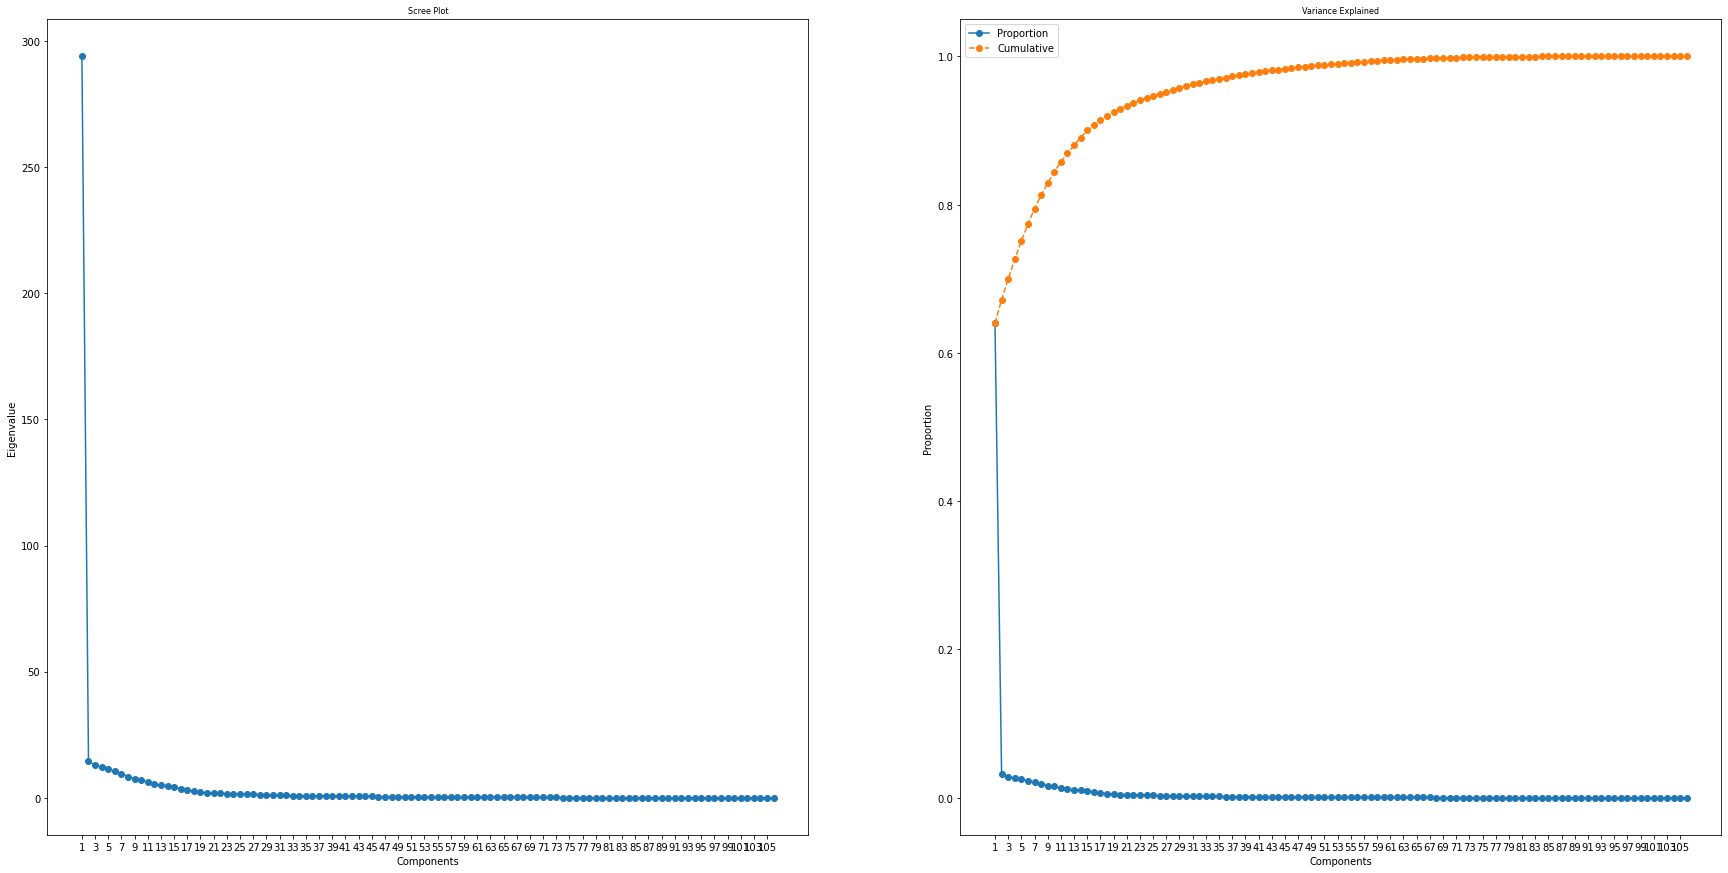

In [24]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=8)
ax2.set_title("Variance Explained", fontsize=8)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [25]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=7)
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat_names1 = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat1, index=df_pca1.index, columns=pca_feat_names1)  # remember index=df_pca.index
pca_df1

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
CONTROLN,,,,,,,
95515,-6.231807,-2.143115,0.167018,-2.124966,-0.271186,-0.136501,-0.805619
15078,-6.316809,-1.256383,0.487927,-1.457811,-1.110539,0.048238,-0.589379
172556,4.406124,4.369176,-1.741919,-3.498286,1.854363,-1.434375,0.835449
47784,-5.006481,0.493193,0.354789,-0.741577,0.046251,-0.096787,0.535168
62117,-6.436617,-2.012878,0.250819,-0.879596,-1.442759,-1.505367,-0.417552
...,...,...,...,...,...,...,...
184568,-5.666014,6.212863,2.103499,9.025270,2.905657,-0.371801,1.033030
122706,0.353095,0.112766,-3.856534,10.342142,2.070971,-2.546364,1.536272
189641,-6.377769,0.918806,0.353377,-3.052542,-1.650250,0.062823,-1.160284


In [26]:
# Reassigning df to contain pca variables

df_pca1 = pd.concat([df_pca1, pca_df1], axis=1)
df_pca1.head()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,DMA_803.0,DMA_807.0,DMA_Other,PC0,PC1,PC2,PC3,PC4,PC5,PC6
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0,0,0.000000,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,-6.231807,-2.143115,0.167018,-2.124966,-0.271186,-0.136501,-0.805619
15078,0,0,0.000000,3,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,-6.316809,-1.256383,0.487927,-1.457811,-1.110539,0.048238,-0.589379
172556,0,0,0.000000,1,0.666667,-1,-1,0,0,0,...,0.0,0.0,1.0,4.406124,4.369176,-1.741919,-3.498286,1.854363,-1.434375,0.835449
47784,0,0,0.000000,5,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,-5.006481,0.493193,0.354789,-0.741577,0.046251,-0.096787,0.535168
62117,0,0,0.142857,4,0.000000,-1,-1,0,0,0,...,0.0,0.0,1.0,-6.436617,-2.012878,0.250819,-0.879596,-1.442759,-1.505367,-0.417552


In [27]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[metric_features + pca_feat_names1].corr().loc[metric_features, pca_feat_names1]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
NUMCHLD,-0.025804,0.002929,-0.026658,0.020057,0.012702,-0.025298,0.020849
HIT,-0.002950,-0.082375,-0.036383,-0.053700,0.021435,0.010421,-0.025576
POP901,0.019856,0.192926,-0.003778,-0.049814,-0.000503,0.048965,0.096634
POP90C1,0.223908,0.198823,-0.261112,-0.060219,0.104650,-0.007076,-0.000879
POP90C2,-0.123947,-0.032829,0.118357,-0.002517,-0.068051,0.009249,-0.047957
POP90C3,-0.167673,-0.208867,0.215380,0.073106,-0.070315,0.001235,0.038885
POP90C4,0.028970,0.067423,0.000126,0.031083,0.238685,-0.051073,0.152142
POP90C5,-0.029027,-0.067430,-0.000072,-0.031028,-0.238655,0.051064,-0.152184
ETH1,-0.027154,-0.804527,-0.062402,0.175025,0.352129,-0.082324,-0.002552
ETH2,-0.100320,0.474797,0.044697,-0.096870,-0.682782,0.150123,-0.098997


In [28]:
donors = pd.concat([donors, pca_df1], axis=1)

In [29]:
pd.DataFrame(data=pca.inverse_transform(pca_df1[pca_feat_names1]))

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.031679,1.077720,0.495637,-0.493169,0.167484,0.570120,-0.256690,0.256928,-0.063249,0.830704,...,0.584352,-0.229854,-0.336728,-0.155085,-0.991631,-0.401351,-0.144050,0.319490,-0.016718,0.017974
1,0.031599,1.007423,0.615828,-0.500974,0.172936,0.574251,-0.288098,0.288340,-0.391188,1.581960,...,0.483044,-0.039374,-0.172936,-0.059162,-0.290758,-0.228618,-0.148595,0.256531,0.016269,-0.014921
2,0.033886,0.887161,1.559559,-0.153315,0.082849,0.125064,0.131610,-0.131475,-1.592608,1.448402,...,0.393529,-0.100739,-0.910108,-0.245639,-0.356995,-0.498487,-0.198970,0.181249,0.025061,-0.023871
3,0.033175,0.917536,0.919705,-0.433205,0.150564,0.495194,-0.101514,0.101752,-0.664449,1.335046,...,0.333156,0.234917,0.085428,0.093251,0.620625,0.039513,-0.178122,0.158925,0.056944,-0.055503
4,0.033105,1.009829,0.441870,-0.520411,0.172522,0.608877,-0.286951,0.287200,-0.133381,1.236796,...,0.396457,-0.095288,-1.322077,-0.391283,0.319604,-0.683058,-0.158330,0.203613,0.077586,-0.075688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90475,0.038989,0.418300,1.346623,-0.393716,0.131644,0.459551,0.334360,-0.333922,-1.240580,0.942422,...,-0.899246,2.637426,2.104006,1.307373,9.400133,2.233186,-0.313710,-0.607468,0.455138,-0.451823
90476,0.043980,0.695759,0.453804,-0.320944,0.072567,0.435874,0.244664,-0.244313,0.604993,-1.454146,...,-1.023418,2.619667,0.675546,0.921279,10.398150,1.710762,-0.355530,-0.671585,0.535858,-0.531013
90477,0.030486,0.972018,0.926675,-0.437133,0.172361,0.463826,-0.332232,0.332444,-1.163834,2.821542,...,0.569667,-0.253639,-0.448839,-0.193212,-1.062187,-0.457703,-0.137695,0.303744,-0.017556,0.018519
90478,0.029634,1.223286,1.059750,-0.224872,0.081674,0.251929,0.176785,-0.176642,0.111127,-1.691998,...,0.970878,-0.270035,3.220465,0.846829,-3.999364,0.911070,-0.149120,0.552855,-0.270582,0.270108


In [30]:
robust[metric_features].head()

,NUMCHLD,HIT,POP901,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE,INACTIVITY,PROMUSE
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,0.000000,0.000000,-0.278863,-1.000000,0.353535,1.140351,-0.666667,0.666667,-0.066667,0.000000,...,2.4,0.000000,-0.555556,-0.5,-0.333333,-0.550161,-0.285714,0.500000,0.0,0.0
15078,0.000000,0.666667,2.532694,-1.000000,0.020202,1.719298,0.000000,0.000000,0.200000,0.166667,...,2.0,-0.428571,-0.111111,-1.0,0.555556,-0.587463,0.321429,0.333333,0.0,0.0
172556,0.000000,0.666667,-0.443561,-1.000000,0.080808,1.614035,1.666667,-1.666667,-2.133333,-0.166667,...,0.9,-0.428571,-0.666667,-0.5,0.222222,-0.683273,0.035714,0.833333,0.0,0.0
47784,0.000000,0.000000,7.759504,-0.181818,0.000000,0.333333,0.000000,0.000000,0.000000,0.833333,...,-0.3,0.714286,-0.111111,0.0,-0.111111,0.167089,0.321429,-0.333333,1.2,-1.2
62117,0.142857,0.000000,-0.243771,-1.000000,1.000000,0.000000,-1.000000,1.000000,0.400000,-0.166667,...,0.7,-0.285714,-0.555556,-0.4,-0.333333,-0.564351,-1.107143,0.833333,1.6,-1.6


# Perspectives

In [31]:
#didn't put MSA e DMA and EC1
neighborhood_metricfeatures=['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HC15','ANC1','ANC2','ANC3','ANC4', 'ANC5','ANC6','ANC7','ANC8', 'ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9','ETH10','ETH11','ETH12','OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','IC3','IC5','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13','IC14','LFC10','VOC1','VOC2','VOC3','HU2','HU5','AGE904','AGE907','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','AC1','AC2','AFC1','AFC4']

In [32]:
#instead of MAXDATE, LASTDATE we will use PROMUSE and we will take out SOLP3, SOLIH and MDMAUD and RFA_2R,RFA_2A becacuse they are categorical encoded variables. We will also remove 'COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES' because they are binary variables. And we should remove DATASRCE because is a categorical variable.

communication_metricfeatures=['HIT','NUMPRM12','NUMPROM','NGIFTALL','RAMNTALL','PROMUSE','AVGGIFT']

In [33]:
socio_demo_metricfeatures=['AGE']#numchild to remove
behav_metricfeatures = ['RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT','INACTIVITY'] 

In [34]:
cluster_neighborhood = donors[neighborhood_metricfeatures].copy()
cluster_communication = donors[communication_metricfeatures].copy()
cluster_socio_demographic=donors['AGE'].copy()
cluster_behaviour=donors[behav_metricfeatures].copy()


In [35]:
#didn't put MSA e DMA and EC1
neighborhood_up_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14']

In [36]:
cluster_neighborhood_up = donors[neighborhood_up_metricfeatures].copy()

In [37]:
behav_up_metricfeatures = ['MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL'] 

In [38]:
cluster_up_behaviour=donors[behav_up_metricfeatures].copy()

In [39]:
#we can try to put communication features in behav cluster

In [40]:
#distribution of age 

In [41]:
donors['AGE']

CONTROLN
95515    -0.285714
15078     0.321429
172556    0.035714
47784     0.321429
62117    -1.107143
            ...   
184568    0.321429
122706   -0.750000
189641   -0.321429
4693     -0.392857
185114    0.392857
Name: AGE, Length: 90480, dtype: float64

<ipython-input-42-5ac3ca9aaa78>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-42-5ac3ca9aaa78>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


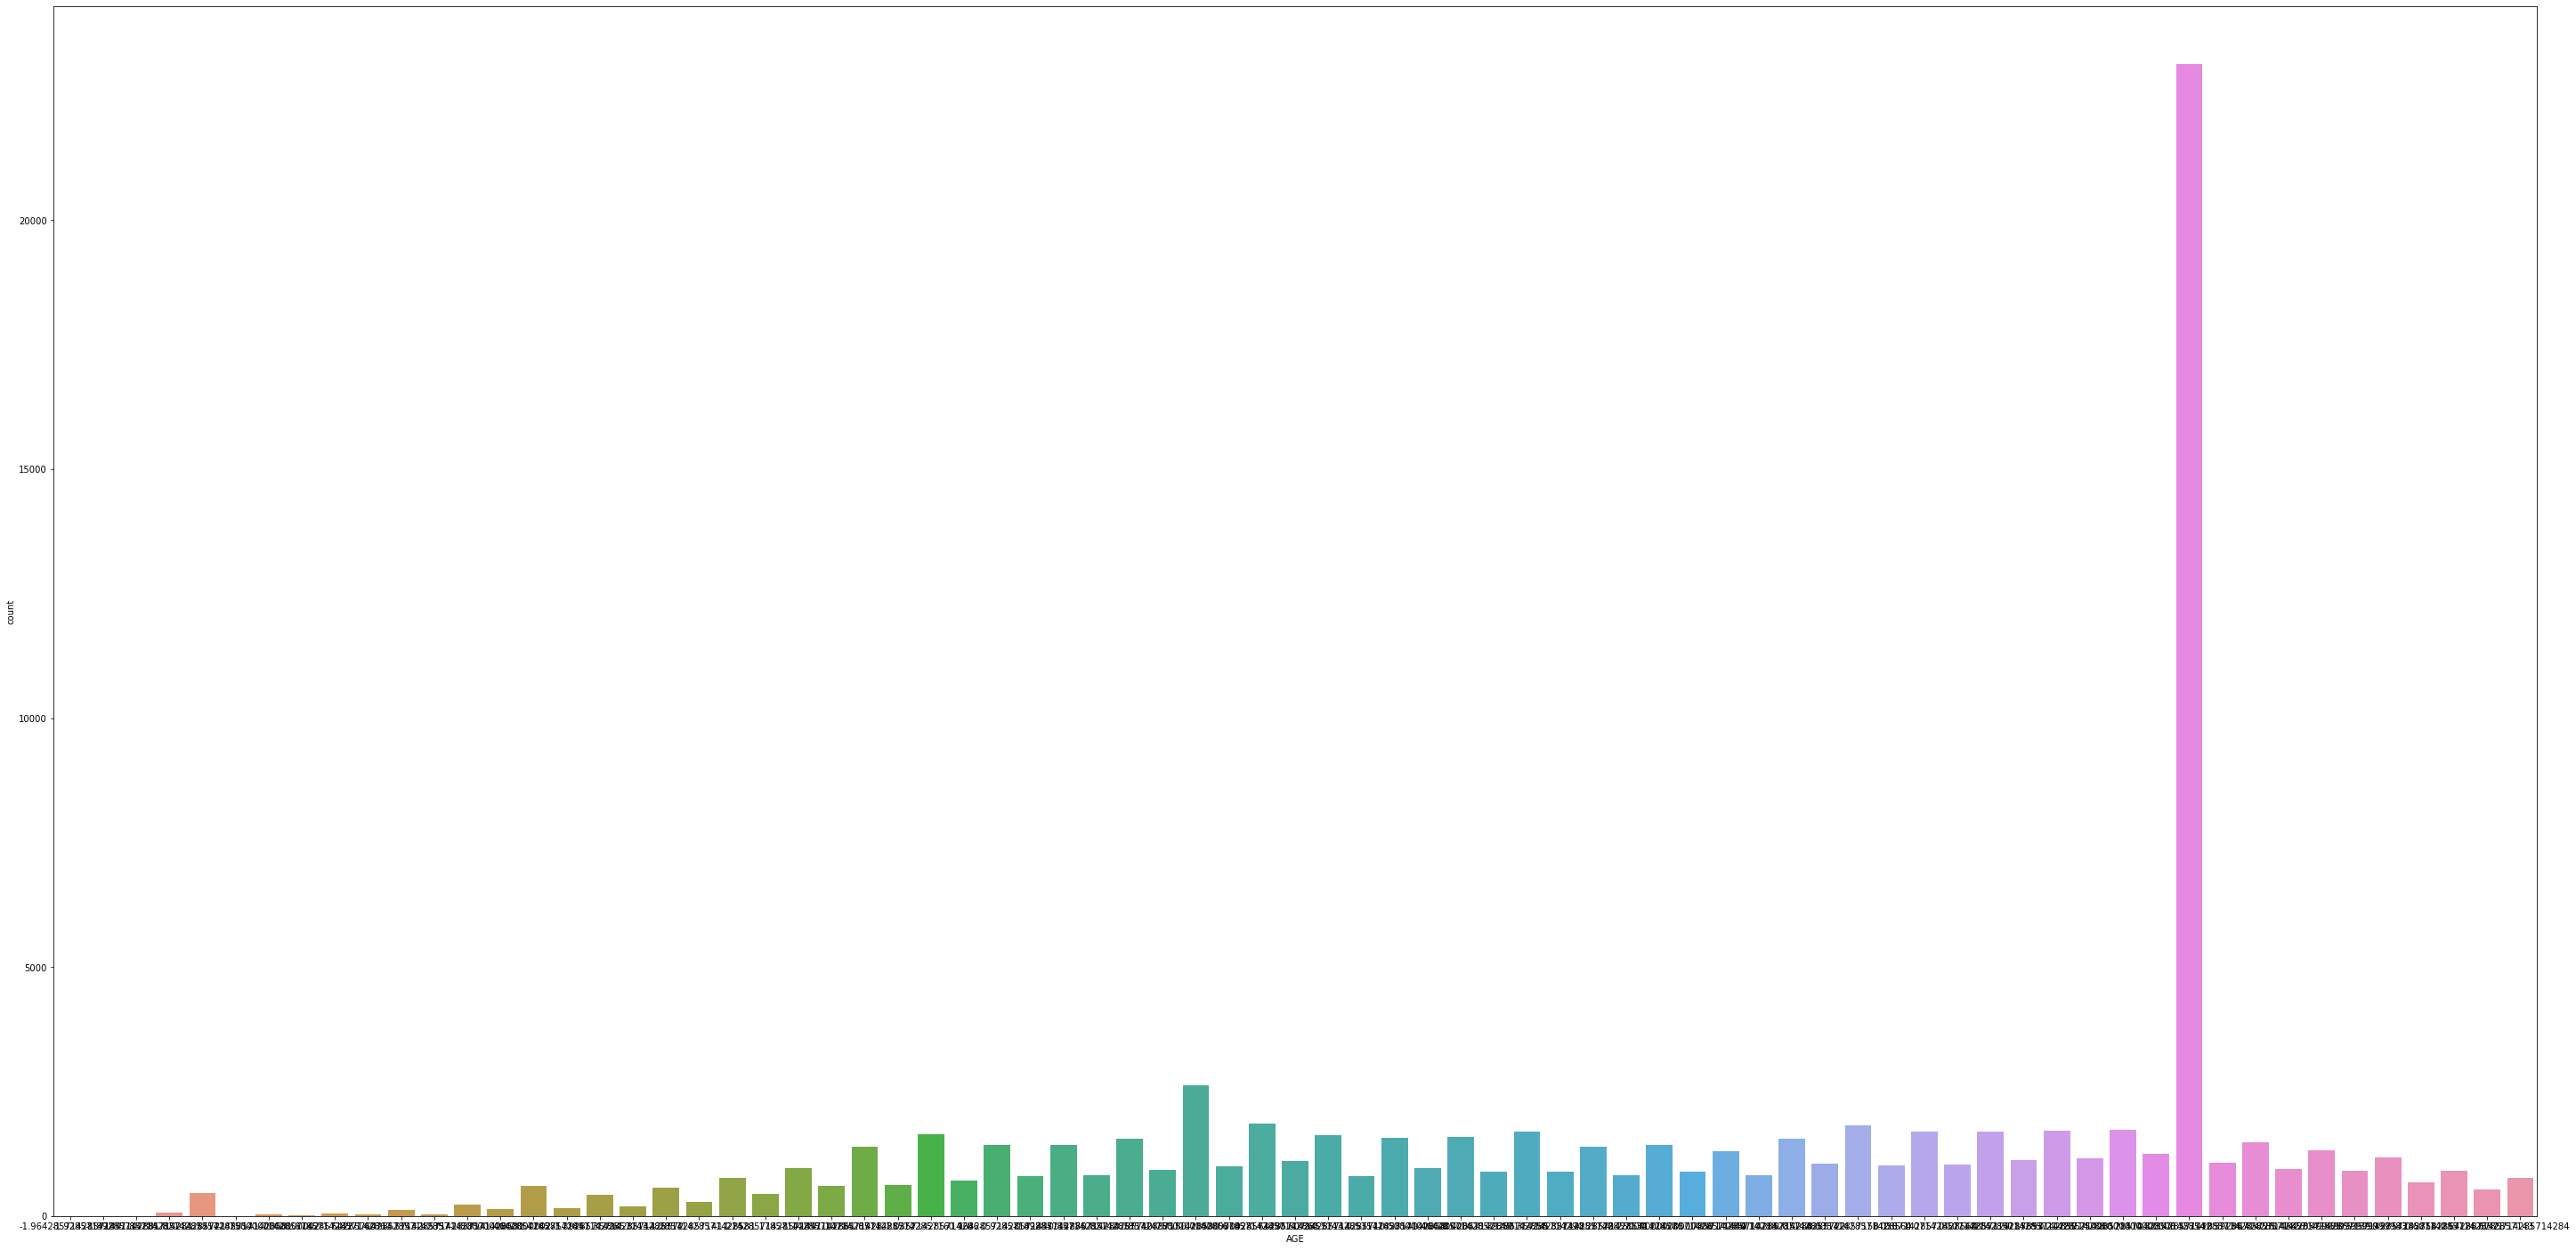

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,25))
sns.countplot(x=donors["AGE"])
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)


# Kmeans neigh updates

<ipython-input-116-587057d176c6>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-116-587057d176c6>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


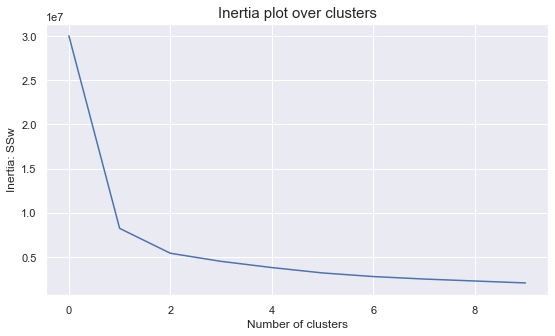

In [116]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_neighborhood_up)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [117]:
# final cluster solution
number_clusters = 3
kmclust_neighborhood_up = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_neighborhood_up = kmclust_neighborhood_up.fit_predict(cluster_neighborhood_up)
pd.DataFrame(kmclust_neighborhood_up.transform(cluster_neighborhood_up))
km_labels_neighborhood_up

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
# Characterizing the final clusters
df_concat_neighborhood_up = pd.concat((donors, pd.Series(km_labels_neighborhood_up, name='labels')), axis=1)
df_concat_neighborhood_up.groupby('labels').mean()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,DMA_Other,PC0,PC1,PC2,PC3,PC4,PC5,PC6,behavior_up_labels,neighborhood_up_labels
labels,,,,,,,,,,,,,,,,,,,,,
0.0,0.000232,0.023843,0.033663,3.803420,0.966746,-0.553627,0.558793,0.077934,0.115158,0.104800,...,0.930332,-3.410583,-0.855021,-0.018600,-0.088644,-0.517144,0.328099,-0.159515,0.092504,0.077366
1.0,0.000000,0.022674,0.034967,3.767442,0.914147,-0.529651,0.499419,0.066860,0.116279,0.101163,...,0.943023,-3.801143,-0.805925,0.127563,-0.107124,-0.655066,0.235688,-0.173329,0.093605,0.059302
2.0,0.001147,0.024474,0.036766,3.741109,1.066667,-0.655832,0.438623,0.077629,0.113576,0.106310,...,0.933078,-3.889161,-0.781961,-0.086974,-0.108694,-0.639370,0.298283,-0.204980,0.092161,0.063862


In [119]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat_neighborhood_up[neighborhood_up_metricfeatures])  # get total sum of squares
ssw_labels = df_concat_neighborhood_up[neighborhood_up_metricfeatures + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_neighborhood_up = ssb / sst
r2_neighborhood_up

0.8144690684153303

# Kmeans behav updated

<ipython-input-280-a034a82cd13a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9,5))
<ipython-input-280-a034a82cd13a>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-280-a034a82cd13a>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


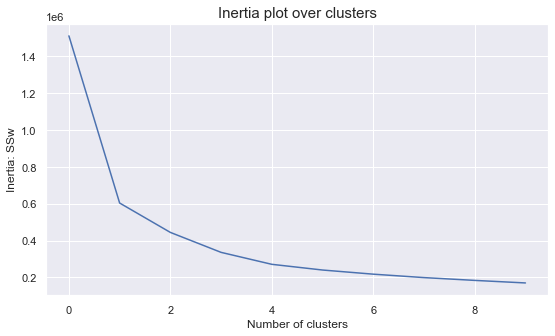

In [280]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_up_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [281]:
# final cluster solution
number_clusters = 4
kmclust_behavup = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_behavup = kmclust_behavup.fit_predict(cluster_up_behaviour)
pd.DataFrame(kmclust_behavup.transform(cluster_up_behaviour))
km_labels_behavup

array([0, 0, 0, ..., 0, 0, 2])

In [282]:
donors['behavior_up_labels']= km_labels_behavup 
donors['neighborhood_up_labels']=km_labels_neighborhood_up

ValueError: Length of values does not match length of index

In [198]:
donors=donors[donors['behavior_up_labels']!=2]

In [200]:
cluster_up_behaviour=donors[behav_up_metricfeatures].copy()

<ipython-input-201-a034a82cd13a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9,5))
<ipython-input-201-a034a82cd13a>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-201-a034a82cd13a>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


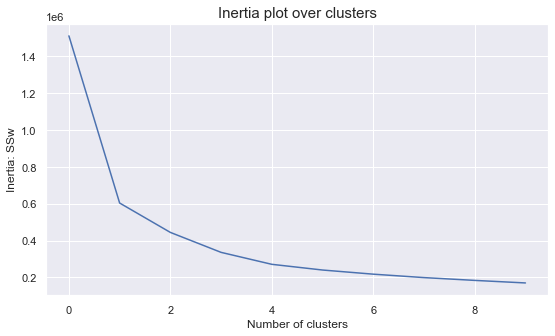

In [201]:
# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cluster_up_behaviour)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [211]:
# final cluster solution
number_clusters = 3
kmclust_behavup = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_behavup = kmclust_behavup.fit_predict(cluster_up_behaviour)
pd.DataFrame(kmclust_behavup.transform(cluster_up_behaviour))
km_labels_behavup

array([0, 0, 0, ..., 0, 0, 1])

In [212]:
# Characterizing the final clusters
df_concat_behavup = pd.concat((donors, pd.Series(km_labels_behavup, name='labels')), axis=1)
df_concat_behavup.groupby('labels').mean()

,RECPGVG,RECSWEEP,NUMCHLD,INCOME,HIT,SOLP3,SOLIH,COLLECT1,VETERANS,BIBLE,...,DMA_Other,PC0,PC1,PC2,PC3,PC4,PC5,PC6,behavior_up_labels,neighborhood_up_labels
labels,,,,,,,,,,,,,,,,,,,,,
0.0,0.000288,0.023537,0.033969,3.796446,0.965803,-0.554964,0.544454,0.077244,0.114725,0.104215,...,0.931118,-3.475547,-0.848567,-0.020413,-0.092803,-0.535574,0.318765,-0.162401,0.212047,0.075514
1.0,0.000000,0.027848,0.033273,3.693671,1.009283,-0.670886,0.460759,0.086076,0.098734,0.116456,...,0.936709,-3.941079,-0.672509,0.200929,-0.191136,-0.574303,0.302873,-0.087455,0.189873,0.081013
2.0,0.000222,0.026006,0.033404,3.821960,1.009187,-0.582129,0.593910,0.078684,0.119804,0.108246,...,0.929540,-3.240421,-0.867143,-0.002651,-0.077266,-0.490750,0.294901,-0.173929,0.213825,0.078017


In [213]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat_behavup[behav_up_metricfeatures])  # get total sum of squares
ssw_labels = df_concat_behavup[behav_up_metricfeatures + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2_behav_up = ssb / sst
r2_behav_up

0.5508946878495872

# Performance of Kmeans

In [277]:
len(km_labels_behavup)

90478

In [278]:
len(donors)

90480

In [214]:
data={'kmeans_cluster_neighborhood_up':[r2_neighborhood_up],'kmeans_cluster_behaviour_up':[r2_behav_up]}
r2_scores=pd.DataFrame(data).from_dict(data, orient='index')
r2_scores

,0
kmeans_cluster_neighborhood_up,0.814469
kmeans_cluster_behaviour_up,0.550895


In [215]:
donors['behavior_up_labels']= km_labels_behavup 
donors['neighborhood_up_labels']=km_labels_neighborhood_up


ValueError: Length of values does not match length of index

In [216]:
# Count label frequencies (contigency table)
donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,72301,3179,4755
1,699,61,64
2,8324,432,663


In [217]:
# Percentage
donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0).div(len(donors.index)).mul(100)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,79.910033,3.513561,5.255421
1,0.772563,0.067420,0.070735
2,9.200027,0.477464,0.732775


In [218]:
# Clusters with low frequency to be merged:
to_merge = [(1,1), (2,1)]

df_centroids = donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(1, 1): (1, 0), (2, 1): (2, 0)}

In [219]:
df_ = donors.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['neighborhood_up_labels']==source[0]) & (df_['behavior_up_labels']==source[1])
    df_.loc[mask, 'neighborhood_up_labels'] = target[0]
    df_.loc[mask, 'behavior_up_labels'] = target[1]

# New contigency table
df_.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('behavior_up_labels', 'neighborhood_up_labels', 0)

neighborhood_up_labels,0,1,2
behavior_up_labels,,,
0,72301.0,3240.0,4819.0
1,699.0,NaN,NaN
2,8324.0,432.0,663.0


In [230]:
# Merged cluster centroids

table_clusters=donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [analysis_metricfeatures].mean()

In [235]:
donors[analysis_metricfeatures]

,ETH1,ETH2,ETH3,ETH4,HVP1,HVP2,HVP6,HVP3,IC5,IC13,IC14,MAXRAMNT,TIMELAG,AVGGIFT,RAMNTALL
CONTROLN,,,,,,,,,,,,,,,
95515,-0.066667,0.000000,0.0,-0.5,0.111111,0.16,0.0,-0.062500,-0.117892,0.0,0.5,-0.555556,-0.333333,-0.550107,1.811111
15078,0.200000,0.166667,0.0,-0.5,-0.111111,-0.08,0.0,-0.171875,-0.299597,0.0,0.5,-0.111111,0.555556,-0.587406,1.388889
172556,-2.133333,-0.166667,0.0,5.0,1.000000,0.88,10.0,0.515625,0.194495,0.0,2.0,-0.666667,0.222222,-0.683207,0.355556
47784,0.000000,0.833333,1.0,0.0,0.222222,0.24,1.0,0.218750,0.262477,1.0,0.5,-0.111111,-0.111111,0.167073,-0.288889
62117,0.400000,-0.166667,0.0,-0.5,-0.111111,-0.08,0.0,-0.250000,-0.419018,0.0,0.0,-0.555556,-0.333333,-0.564296,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,-1.000000,1.500000,6.0,1.5,0.111111,0.28,0.0,0.500000,0.705686,2.0,1.0,0.888889,10.333333,1.921334,-0.577778
122706,-0.133333,0.333333,0.0,0.5,1.888889,2.72,5.0,1.109375,1.780481,2.0,7.5,0.333333,10.333333,1.205309,-0.633333
189641,-0.733333,2.166667,0.0,0.0,-0.111111,-0.12,0.0,-0.265625,-0.215904,0.0,0.0,-0.777778,-0.444444,-0.472236,-0.211111


In [268]:
tabel_clusters=(table_clusters*iqr)+median

In [269]:
tabel_clusters

ETH1      ETH2      ETH3  \
neighborhood_up_labels behavior_up_labels                                  
0                      0                   86.189002  7.936944  0.832727   
                       1                   87.432046  6.423462  1.123033   
                       2                   83.615329  9.536761  0.906655   
1                      0                   83.959421  2.648317  0.197546   
                       1                   84.295082  3.737705  0.180328   
                       2                   83.949074  3.243056  0.164352   
2                      0                   82.121136  3.373502  0.426709   
                       1                   84.437500  4.031250  0.296875   
                       2                   82.208145  3.190045  0.425339   

                                                ETH4       HVP1       HVP2  \
neighborhood_up_labels behavior_up_labels                                    
0                      0                    1.941052   5.532330  12.603270   
                       1                    2.231760   8.609442  18.144492   
                       2                    2.321720   6.130706  14.197621   
1                      0                   10.667191  93.247248  96.633218   
                       1                    8.852459  93.426230  96.442623   
                       2                   10.324074  92.828704  96.571759   
2                      0                    9.883281  68.271504  83.731441   
                       1                    6.625000  66.312500  81.593750   
                       2                    9.983409  68.825038  83.533937   

                                                HVP6       HVP3           IC5  \
neighborhood_up_labels behavior_up_labels                                       
0                      0                    0.982711  27.628069  14141.732645   
                       1                    1.736767  36.283262  15561.632332   
                       2                    1.100553  30.249760  14316.907136   
1                      0                   76.773199  98.186222  31051.287512   
                       1                   76.295082  98.278689  29575.081967   
                       2                   76.240741  98.280093  31781.564815   
2                      0                   30.141115  93.535857  24435.104522   
                       1                   29.984375  92.500000  24717.171875   
                       2                   31.686275  93.060332  24366.659125   

                                               IC13      IC14    MAXRAMNT  \
neighborhood_up_labels behavior_up_labels                                   
0                      0                   0.617474  1.045394   18.291563   
                       1                   0.762518  1.440629  124.136366   
                       2                   0.671072  1.127463   20.393944   
1                      0                   4.271469  9.444479   20.796033   
                       1                   4.590164  7.442623  105.065574   
                       2                   4.233796  9.770833   21.483542   
2                      0                   2.596215  5.525342   20.029579   
                       1                   2.765625  6.468750  131.627187   
                       2                   2.526395  5.322775   20.880845   

                                              TIMELAG    AVGGIFT    RAMNTALL  
neighborhood_up_labels behavior_up_labels                                     
0                      0                     8.008064  11.681265  107.245771  
                       1                    13.894134  58.619164  545.367940  
                       2                    99.943417  20.361180   20.522007  
1                      0                     8.410821  13.799014  111.281963  
                       1                    17.213115  56.813034  366.948033  
                       2                   100.000000  21.4

In [88]:
#didn't put MSA e DMA and EC1
neighborhood_metricfeatures=['HVP1','HVP2','HVP3','HVP4','HVP5','HVP6','HC15','ANC1','ANC2','ANC3','ANC4', 'ANC5','ANC6','ANC7','ANC8', 'ANC9','ANC10','ANC11','ANC12','ANC13','ANC14','ANC15','POBC1','POBC2','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9','ETH10','ETH11','ETH12','OEDC1','OEDC2','OEDC3','OEDC4','OEDC5','OEDC6','OEDC7','EC2','EC3','EC4','EC5','EC6','EC7','EC8','SEC1','SEC2','IC3','IC5','IC6','IC7','IC8','IC9','IC10','IC11','IC12','IC13','IC14','LFC10','VOC1','VOC2','VOC3','HU2','HU5','AGE904','AGE907','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5','AGEC6','AGEC7','AC1','AC2','AFC1','AFC4']
neighborhood_nonmetricfeatures=['MSA_1600.0','MSA_4480.0','MSA_Other','DMA_803.0','DMA_807.0','DMA_Other']

In [89]:
#instead of MAXDATE, LASTDATE we will use PROMUSE and we will take out SOLP3, SOLIH and MDMAUD and RFA_2R,RFA_2A becacuse they are categorical encoded variables. We will also remove 'COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES' because they are binary variables. And we should remove DATASRCE because is a categorical variable.

communication_metricfeatures=['HIT','NUMPRM12','NUMPROM','NGIFTALL','RAMNTALL','PROMUSE','AVGGIFT']
ccommunication_nonmetricfeatures=['COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES', 'SOLP3',
 'SOLIH','DTSRCE_1','DTSRCE_2','DTSRCE_3'] #should we include RFA , MDMAUD?

In [90]:
socio_demo_metricfeatures=['NUMCHLD','AGE']
socio_demo_nonmetricfeatures=['INCOME', 'GENDER_J','GENDER_M','GENDER_U','socio_econ_neighbourhood','STATE_FL','STATE_GA','STATE_IL','STATE_MI','STATE_NC','STATE_Other','STATE_TX','STATE_WA', 'urbanicity_level_1','urbanicity_level_2','urbanicity_level_3','urbanicity_level_4']
#won't put RFA, MDMAUD as it belongs to other cluster

behav_metricfeatures = ['RAMNTALL','NGIFTALL','MINRAMNT','MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT','INACTIVITY'] 
behav_nonmetricfeatures=['RFA_2F','RFA_2A','MDMAUD_F','MDMAUD_A','MDMAUD_R_D','MDMAUD_R_I','MDMAUD_R_L','MDMAUD_R_X']

In [141]:
#didn't put MSA e DMA and EC1
neighborhood_up_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14']

cluster_neighborhood_up = donors[neighborhood_up_metricfeatures].copy()

behav_up_metricfeatures = ['MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL'] 

cluster_up_behaviour=donors[behav_up_metricfeatures].copy()

analysis_metricfeatures=['ETH1','ETH2','ETH3','ETH4','HVP1','HVP2','HVP6','HVP3' ,'IC5','IC13', 'IC14','MAXRAMNT','TIMELAG','AVGGIFT','RAMNTALL']

## Cluster Analysis

<ipython-input-273-8728ad8db6d3>:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-273-8728ad8db6d3>:41: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


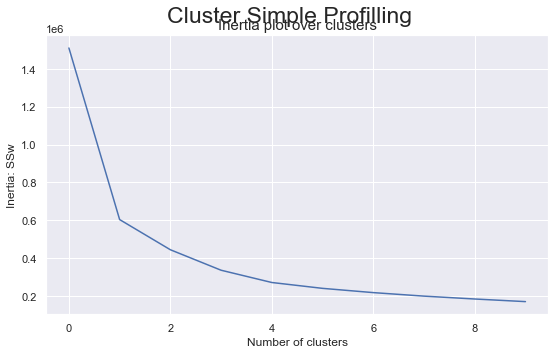

In [273]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
       # ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
plt.subplots_adjust(hspace=0.4, top=0.90)
plt.suptitle("Cluster Simple Profilling", fontsize=23)
cluster_profiles(
    df = donors[metric_features + non_metric_features + ['neighborhood_up_labels', 'behavior_up_labels']], 
    label_columns = ['neighborhood_up_labels', 'behavior_up_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Neighborhood clustering", "Behavior clustering"]
)

plt.show()
print(fig.show())
from IPython.display import display
display(fig)
    

In [274]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = donors[metric_features + non_metric_features + ['neighborhood_up_labels', 'behavior_up_labels']], 
    label_columns = ['neighborhood_up_labels', 'behavior_up_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Neighborhood clustering", "Behavior clustering"]
)



KeyError: "['behavior_up_labels', 'neighborhood_up_labels'] not in index"

<function __main__.cluster_profiles(df, label_columns, figsize, compar_titles=None)>

## Cluster visualization using t-SNE behavior

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_up_behaviour)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['behavior_up_labels'], colormap='tab10', figsize=(15,10))
plt.show()

## Cluster visualization using t-SNE neighborhood

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(cluster_neighborhood_up)

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=donors['neighborhood_up_labels'], colormap='tab10', figsize=(15,10))
plt.show()

### Merging using Hierarchical clustering

In [168]:
# Centroids of the concatenated cluster labels
df_centroids = donors.groupby(['neighborhood_up_labels', 'behavior_up_labels'])\
    [metric_features].mean()
df_centroids

NUMCHLD       HIT    POP901  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                   0.036418  0.686729  0.814163   
                       1                   0.033157  0.958608  0.766485   
                       2                   0.000000  0.000000 -0.213826   
                       3                   0.024116  0.966142  0.955332   
1                      0                   0.021164  0.662037  1.185811   
                       1                   0.024626  0.945266  0.811277   
                       3                   0.014052  1.224044  1.016696   
2                      0                   0.025210  0.772247  0.926685   
                       1                   0.028001  0.934104  1.158253   
                       3                   0.017857  0.708333  3.088110   

                                            POP90C1   POP90C2   POP90C3  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.409499  0.140343  0.471901   
                       1                  -0.446434  0.152959  0.514056   
                       2                   0.000000  0.000000  0.000000   
                       3                  -0.417696  0.137527  0.490801   
1                      0                  -0.037575  0.006921  0.054500   
                       1                  -0.051598  0.008608  0.076014   
                       3                  -0.053486  0.000000  0.095197   
2                      0                  -0.139190  0.042065  0.171046   
                       1                  -0.149450  0.051531  0.172660   
                       3                  -0.131155  0.017203  0.200384   

                                            POP90C4   POP90C5      ETH1  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.092504  0.092864 -0.625645   
                       1                  -0.140925  0.141169 -0.454067   
                       2                  -0.833333  0.833333 -0.266667   
                       3                  -0.150215  0.150215 -0.371197   
1                      0                  -0.104938  0.104938 -0.603395   
                       1                  -0.069938  0.069938 -0.602705   
                       3                  -0.027322  0.027322 -0.580328   
2                      0                   0.020613 -0.020613 -0.719457   
                       1                  -0.043884  0.044024 -0.725258   
                       3                   0.067708 -0.067708 -0.570833   

                                               ETH2  ...  NGIFTALL  MINRAMNT  \
neighborhood_up_labels behavior_up_labels            ...                       
0                      0                   1.422794  ... -0.598859  2.186744   
                       1                   1.156157  ...  0.364338  0.157397   
                       2                   0.583333  ...  0.250000  3.755000   
                       3                   0.903910  ...  0.590558  2.928361   
1                      0                   0.373843  ... -0.599306  2.343218   
                       1                   0.274720  ...  0.213904  0.346249   
                       3                   0.456284  ...  0.150820  3.180328   
2                      0                   0.365008  ... -0.599548  2.263952   
                       1                   0.395584  ...  0.274953  0.280350   
                       3                   0.505208  ...  0.535938  2.455670   

                                             MAXRAMNT  LASTGIFT    TIMELAG  \
neighborhood_up_labels behavior_up_labels                                    
0                      0                     0.377105  0.538914  10.327046   
                       1                     0.143507  0.080025   0.112007   
                       2                   420.444444  4.000000  -0.

In [169]:
df_centroids.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (0, 3),
            (1, 0),
            (1, 1),
            (1, 3),
            (2, 0),
            (2, 1),
            (2, 3)],
           names=['neighborhood_up_labels', 'behavior_up_labels'])

In [170]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

In [171]:
hclust_labels

array([8, 9, 7, 5, 4, 3, 6, 1, 2, 0], dtype=int64)

In [172]:
linkage = 'ward'
distance = 'euclidean'

<ipython-input-173-4ddb5828d6d2>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))
<ipython-input-173-4ddb5828d6d2>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-173-4ddb5828d6d2>:41: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


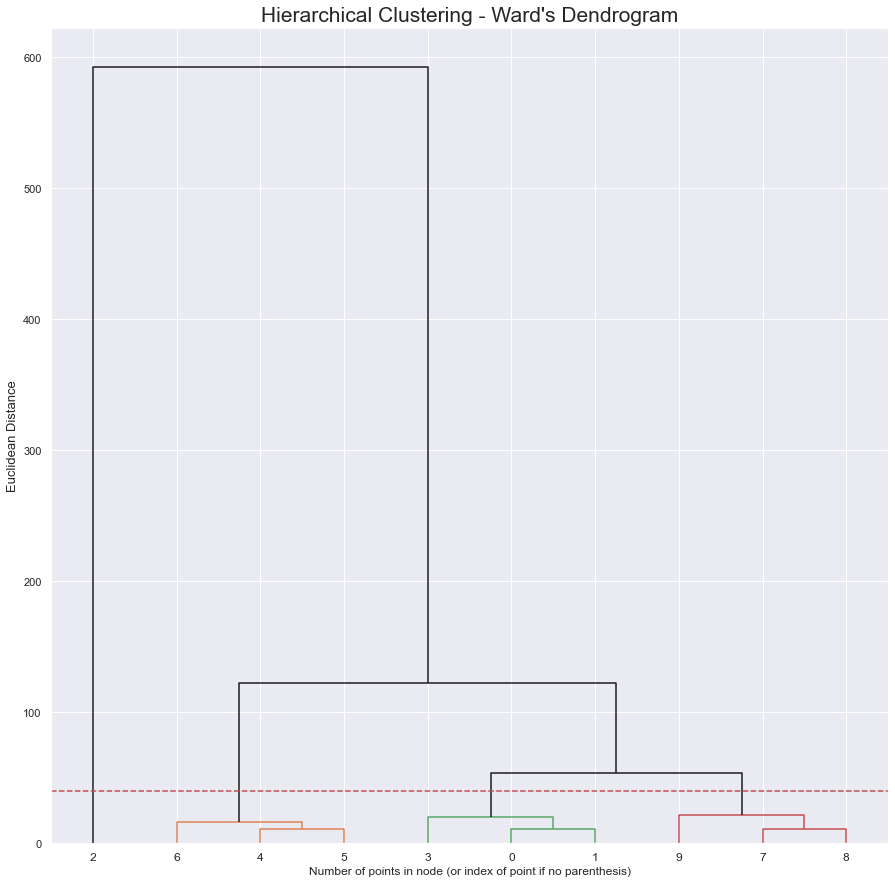

In [173]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(15,15))
# The Dendrogram parameters need to be tuned
y_threshold = 40
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [174]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

NUMCHLD       HIT    POP901  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                   0.036418  0.686729  0.814163   
                       1                   0.033157  0.958608  0.766485   
                       2                   0.000000  0.000000 -0.213826   
                       3                   0.024116  0.966142  0.955332   
1                      0                   0.021164  0.662037  1.185811   
                       1                   0.024626  0.945266  0.811277   
                       3                   0.014052  1.224044  1.016696   
2                      0                   0.025210  0.772247  0.926685   
                       1                   0.028001  0.934104  1.158253   
                       3                   0.017857  0.708333  3.088110   

                                            POP90C1   POP90C2   POP90C3  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.409499  0.140343  0.471901   
                       1                  -0.446434  0.152959  0.514056   
                       2                   0.000000  0.000000  0.000000   
                       3                  -0.417696  0.137527  0.490801   
1                      0                  -0.037575  0.006921  0.054500   
                       1                  -0.051598  0.008608  0.076014   
                       3                  -0.053486  0.000000  0.095197   
2                      0                  -0.139190  0.042065  0.171046   
                       1                  -0.149450  0.051531  0.172660   
                       3                  -0.131155  0.017203  0.200384   

                                            POP90C4   POP90C5      ETH1  \
neighborhood_up_labels behavior_up_labels                                 
0                      0                  -0.092504  0.092864 -0.625645   
                       1                  -0.140925  0.141169 -0.454067   
                       2                  -0.833333  0.833333 -0.266667   
                       3                  -0.150215  0.150215 -0.371197   
1                      0                  -0.104938  0.104938 -0.603395   
                       1                  -0.069938  0.069938 -0.602705   
                       3                  -0.027322  0.027322 -0.580328   
2                      0                   0.020613 -0.020613 -0.719457   
                       1                  -0.043884  0.044024 -0.725258   
                       3                   0.067708 -0.067708 -0.570833   

                                               ETH2  ...  MINRAMNT  \
neighborhood_up_labels behavior_up_labels            ...             
0                      0                   1.422794  ...  2.186744   
                       1                   1.156157  ...  0.157397   
                       2                   0.583333  ...  3.755000   
                       3                   0.903910  ...  2.928361   
1                      0                   0.373843  ...  2.343218   
                       1                   0.274720  ...  0.346249   
                       3                   0.456284  ...  3.180328   
2                      0                   0.365008  ...  2.263952   
                       1                   0.395584  ...  0.280350   
                       3                   0.505208  ...  2.455670   

                                             MAXRAMNT  LASTGIFT    TIMELAG  \
neighborhood_up_labels behavior_up_labels                                    
0                      0                     0.377105  0.538914  10.327046   
                       1                     0.143507  0.080025   0.112007   
                       2                   420.444444  4.000000  -0.388889   
                       3                    11.904041  7.069910   0.766015   
1                      0        

In [175]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = donors.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['neighborhood_up_labels'], row['behavior_up_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

,NUMCHLD,HIT,POP901,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,AGE,TENURE,INACTIVITY,PROMUSE
merged_labels,,,,,,,,,,,,,,,,,,,,,
0,0.033042,0.929648,0.796973,-0.423814,0.145122,0.488275,-0.129653,0.129899,-0.486820,1.131510,...,0.261665,0.398827,0.282668,0.199006,1.177636,0.214103,-0.182528,0.117467,0.077739,-0.076057
1,0.000000,0.000000,-0.213826,0.000000,0.000000,0.000000,-0.833333,0.833333,-0.266667,0.583333,...,0.250000,3.755000,420.444444,4.000000,-0.388889,116.759746,0.321429,0.333333,-0.600000,0.600000
2,0.024043,0.916576,0.858752,-0.049980,0.008266,0.073802,-0.073348,0.073348,-0.602415,0.289397,...,0.117184,0.628266,0.586313,0.463986,1.370249,0.548499,-0.144754,0.043528,0.058061,-0.055773


In [176]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['neighborhood_up_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['behavior_up_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('neighborhood_up_labels', 'behavior_up_labels', 0)

behavior_up_labels,2,3
neighborhood_up_labels,,
0,2.0,NaN
1,NaN,3672.0
2,NaN,86806.0


In [98]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()